In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [28]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [29]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
X_train,X_test = X_train/255.0,X_test/255.0

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [33]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.001),input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.5),

    Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(10,activation='softmax')



])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [37]:
history = model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_test,y_test),callbacks=[early_stopping])

/home/suhas/master_dataklout/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/50
938/938 [==============================] - 66s 69ms/step - loss: 0.6030 - accuracy: 0.9104 - val_loss: 0.3124 - val_accuracy: 0.9797
Epoch 2/50
938/938 [==============================] - 36s 38ms/step - loss: 0.3055 - accuracy: 0.9681 - val_loss: 0.2086 - val_accuracy: 0.9845
Epoch 3/50
938/938 [==============================] - 45s 48ms/step - loss: 0.2379 - accuracy: 0.9719 - val_loss: 0.1815 - val_accuracy: 0.9868
Epoch 4/50
938/938 [==============================] - 46s 49ms/step - loss: 0.2249 - accuracy: 0.9733 - val_loss: 0.1698 - val_accuracy: 0.9884
Epoch 5/50
938/938 [==============================] - 43s 45ms/step - loss: 0.2192 - accuracy: 0.9745 - val_loss: 0.1723 - val_accuracy: 0.9896
Epoch 6/50
938/938 [==============================] - 48s 51ms/step - loss: 0.2172 - accuracy: 0.9759 - val_loss: 0.1743 - val_accuracy: 0.9888
Epoch 7/50
938/938 [==============================] - 43s 46ms/step - loss: 0.2141 - accuracy: 0.9761 - val_loss: 0.1774 - val_accuracy:

In [38]:
test_loss ,test_acc = model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy:{test_acc}")

313/313 - 2s - loss: 0.1657 - accuracy: 0.9900
Test Accuracy:0.9900000095367432


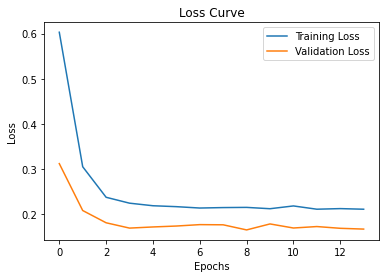

In [39]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

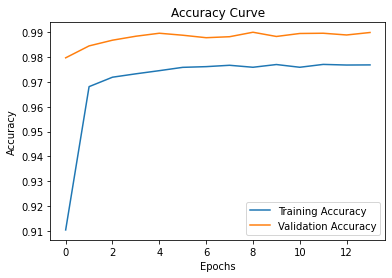

In [40]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()
